# Introdução


In [2]:
!git clone https://github.com/henriquepgomide/caRtola

Cloning into 'caRtola'...
remote: Enumerating objects: 2083, done.
remote: Total 2083 (delta 0), reused 0 (delta 0), pack-reused 2083
Receiving objects: 100% (2083/2083), 178.43 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (1160/1160), done.


In [3]:
import os
rootdir = os.curdir
os.chdir('caRtola/data')
os.listdir()

['2018',
 '2016',
 '2014',
 'dados_agregados_amostras.csv',
 'dados_agregados_limpos.csv',
 'posicoes_ids.csv',
 '2017',
 'README.md',
 '2015',
 'times_ids.csv',
 'dados_agregados.csv']

# Objetivo
```
# This is formatted as code
```



# Metodologia


# Análise


## Limpeza

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import _pickle as plk
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

pd.set_option('display.max_columns', 100)

In [5]:
df = pd.read_csv('dados_agregados.csv')
print(df.shape)
df.head(10)

(43821, 77)


,AtletaID,Rodada,ClubeID,Participou,Posicao,Jogos,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,ano,Apelido,Status,avg.Points,avg.last05,avg.FS,avg.FS.l05,avg.PE,avg.PE.l05,avg.A,avg.A.l05,avg.FT,avg.FT.l05,avg.FD,avg.FD.l05,avg.FF,avg.FF.l05,avg.G,avg.G.l05,avg.I,avg.I.l05,avg.PP,avg.PP.l05,avg.RB,avg.RB.l05,avg.FC,avg.FC.l05,avg.GC,avg.GC.l05,avg.CA,avg.CV.l05,avg.SG,avg.SG.l05,avg.DD,avg.DD.l05,avg.DP,avg.DP.l05,avg.GS,avg.GS.l05,risk_points,mes,dia,home.score.x,away.score.x,pred.home.score,pred.away.score,home.attack,home.defend,variable
0,36443,1,285.0,True,gol,1.0,5.0,5.00,10.60,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,NaN,NaN,2.500000,1.00,0.000000,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.500000,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,1.000000,4.0,19.0,1.0,0.0,NaN,NaN,NaN,NaN,home.team
1,36443,2,285.0,True,gol,2.0,-3.0,1.00,8.27,-2.33,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,NaN,NaN,0.666667,1.00,0.666667,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.333333,1.0,0.000000,1.0,0.0,1.0,0.666667,1.0,1.000000,4.0,27.0,2.0,2.0,NaN,NaN,NaN,NaN,away.team
2,36443,3,285.0,True,gol,3.0,-2.6,-0.20,6.81,-1.46,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,NaN,NaN,-0.150000,1.00,0.500000,1.0,0.500000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000,1.0,0.250000,1.0,0.000000,1.0,0.0,1.0,0.750000,1.0,1.000000,5.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN,home.team
3,36443,4,285.0,True,gol,4.0,4.0,0.85,7.96,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2014,NaN,NaN,0.680000,0.68,0.400000,0.4,0.400000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.200000,0.2,0.400000,0.4,0.0,0.0,0.800000,0.8,1.000000,5.0,10.0,2.0,1.0,NaN,NaN,NaN,NaN,home.team
4,36443,5,285.0,True,gol,5.0,5.0,1.68,8.61,0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,NaN,NaN,1.400000,1.68,0.333333,0.4,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.333333,0.4,0.333333,0.4,0.0,0.0,0.666667,0.8,1.000000,5.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN,away.team
5,36443,6,285.0,True,gol,6.0,1.2,1.60,8.02,-0.59,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,1,2014,NaN,NaN,1.371429,0.92,0.285714,0.4,0.428571,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.2,0.0,0.0,0.142857,0.0,0.285714,0.2,0.571429,0.8,0.0,0.0,0.714286,1.0,1.000000,5.0,21.0,1.0,1.0,NaN,NaN,NaN,NaN,away.team
6,36443,7,285.0,True,gol,7.0,-3.3,0.90,6.75,-1.27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2014,NaN,NaN,0.787500,0.86,0.250000,0.0,0.500000,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.2,0.0,0.0,0.125000,0.0,0.250000,0.2,0.625000,1.0,0.0,0.0,1.000000,1.2,1.000000,5.0,25.0,1.0,3.0,NaN,NaN,NaN,NaN,home.team
7,36443,8,285.0,True,gol,8.0,3.0,1.16,7.55,0.80,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2014,NaN,NaN,1.033333,1.98,0.222222,0.0,0.444444,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.2,0.0,0.0,0.222222,0.0,0.333333,0.4,0.555556,1.0,0.0,0.0,0.888889,1.0,1.000000,5.0,28.0,2.0,0.0,NaN,NaN,NaN,NaN,home.team
8,36443,9,285.0,True,gol,9.0,-1.5,0.86,6.71,-0.84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,NaN,NaN,0.780000,0.88,0.300000,0.2,0.400000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.2,0.0,0.0,0.200000,0.0,0.300000,0.4,0.500000,0.6,0.0,0.0,0.900000,1.0,3.320910,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,away.team
9,36443,10,285.0,True,gol,10.0,-4.0,0.37,6.01,-0.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,NaN,NaN,0.345455,-0.92,0.272727,0.2,0.363636,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.2,0.0,0.0,0.181818,0.0,0.272727,0.2,0.454545,0.6,0.0,0.0,1.000000,1.4,3.649901,7.0,17.0,2.0,1.0,NaN,NaN,NaN,NaN,away.team


In [6]:
df_1 = pd.read_csv('2018/rodada-1.csv', index_col=0)

df_1[df_1['G'] == df_1['G'].max()]

,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,atletas.status_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,atletas.clube.id.full.name,FC,FD,FF,FS,G,I,RB,CA,PE,A,SG,DD,FT,GS,CV,GC
5,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,Provável,16.5,23.08,6.08,16.5,Corinthians,1.0,NaN,NaN,2.0,2.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Sergio Antonio Soler de Oliveira Junior,serginho,Serginho,https://s.glbimg.com/es/sde/f/2018/03/17/144f9...,88002,1,AME,mei,Provável,17.9,15.78,10.78,17.9,América-MG,1.0,NaN,1.0,NaN,2.0,1.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,Nicolás Federico López Alonso,nico-lopez,Nico López,https://s.glbimg.com/es/sde/f/2018/04/08/5bb6e...,84709,1,INT,ata,Provável,18.8,17.77,10.77,18.8,Internacional,NaN,1.0,2.0,1.0,2.0,1.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#TODO: improve code.
import re

year='2018'

df_dict = {}
for f in os.listdir(year):
  match = re.match(r'rodada-\d+.csv', f)
  if match:
    r = match.group(0).split('-')[1].split('.')[0]
    df_dict[int(r)] = pd.read_csv('2018/' + f, index_col=0)

df_dict = {key:df_dict[key] for key in sorted(df_dict.keys())}
  
df_2018 = pd.concat(df_dict.values())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


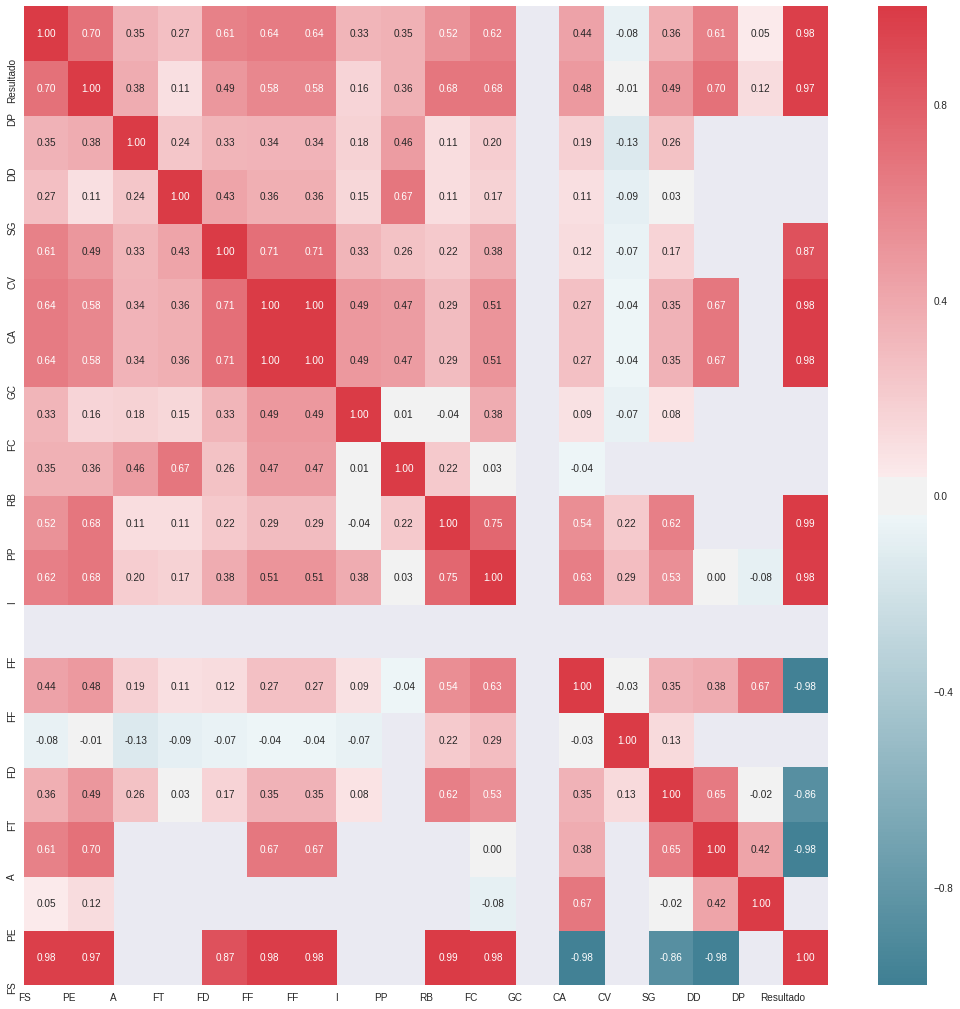

In [22]:
import seaborn as sns

df_2018na = df_2018.fillna(0)

df_2018_ = df_2018[['FS', 'PE', 'A', 'FT', 'FD', 'FF', 'FF', 'I', 'PP', 
                    'RB', 'FC', 'GC', 'CA', 'CV', 'SG', 'DD', 'DP']]

df_2018_['Resultado'] = df_2018['G'].apply(float) - df_2018['GS'].apply(float)
corr = df_2018_.corr()

l = len(corr.columns)

fig, ax = plt.subplots(figsize=(l, l))

colormap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")

plt.xticks(range(l), corr.columns)
plt.yticks(range(l), corr.columns)

plt.show()

In [0]:
matches = pd.read_csv('2018/2018_partidas.csv', index_col=0)

def split_score_home(score):
  if len(score) > 1:
    s = score.split(' x ')
    return int(s[0])
  else:
    return np.nan
  
def split_score_away(score):
  if len(score) > 1:
    s = score.split(' x ')
    return int(s[1])
  else:
    return np.nan
  
 
matches['home_score'] = matches['score'].apply(split_score_home).values
matches['away_score'] = matches['score'].apply(split_score_away).values

# BUG: Column X wtf.
matches.drop('X', axis=1, inplace=True)

In [13]:
# Melhor time?
#Melhores goleiros
df_goleiros = df_2018[df_2018['atletas.posicao_id'] == 'gol']
df_goleiros = df_goleiros[['atletas.rodada_id', 'atletas.atleta_id', 'atletas.clube_id', 'atletas.nome', 'atletas.variacao_num', 'DD', 'DP', 'GS']]
df_goleiros.fillna(0)


,atletas.rodada_id,atletas.atleta_id,atletas.clube_id,atletas.nome,atletas.variacao_num,DD,DP,GS
10,1,38350,AME,Fernando Leal Fonseca,0.00,0.0,0.0,0.0
20,1,84555,AME,Glauco Tadeu Chaves,0.00,0.0,0.0,0.0
21,1,81881,AME,João Ricardo Riedi,0.00,0.0,0.0,0.0
31,1,97930,AME,Erick Martins Ferreira Carvalho,0.00,0.0,0.0,0.0
34,1,97453,AME,Joriwinnyson Santos dos Anjos Rodrigues,9.13,3.0,0.0,0.0
50,1,68979,ATL,Giovanni Aparecido Adriano dos Santos,0.00,0.0,0.0,0.0
54,1,85418,ATL,Uilson Pedruzzi de Oliveira,0.00,0.0,0.0,0.0
63,1,93659,ATL,Michael Matias Fracaro,0.00,0.0,0.0,0.0
64,1,93882,ATL,Cleiton Schwengber,0.00,0.0,0.0,0.0
68,1,97543,ATL,Fernando Rodrigues Caixeta Barbosa,0.00,0.0,0.0,0.0


,game,round,date,home_team,score,away_team,arena,home_score,away_score
1,1,1,14/04/2018 - 16:00,Cruzeiro - MG,0 x 1,Grêmio - RS,Mineirão - Belo Horizonte - MG,0.0,1.0
2,2,1,15/04/2018 - 19:00,Atlético - PR,5 x 1,Chapecoense - SC,Arena da Baixada - Curitiba - PR,5.0,1.0
3,3,1,15/04/2018 - 11:00,América - MG,3 x 0,Sport - PE,Independência - Belo Horizonte - MG,3.0,0.0
4,4,1,14/04/2018 - 19:00,Vitória - BA,2 x 2,Flamengo - RJ,Manoel Barradas - Salvador - BA,2.0,2.0
5,5,1,15/04/2018 - 16:00,Vasco da Gama - RJ,2 x 1,Atlético - MG,São Januário - Rio de Janeiro - RJ,2.0,1.0
